In [24]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
                             roc_curve, roc_auc_score, classification_report,precision_recall_curve )

In [25]:
df = pd.read_csv(r"C:\Users\Chinna Joka\Downloads\Logistic Regresssion Project\Logistic Regresssion Project\Dataset\h1n1_vaccine_prediction.csv")
df.head()


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [26]:
df.shape

(26707, 34)

In [27]:
numerical_features = df.select_dtypes(include=['int64' ,'float64']).columns
df[numerical_features].describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [28]:
numerical_features

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [29]:
categorical_features = df.select_dtypes(exclude=['int64' , 'float64']).columns
df[categorical_features] #9 categorical features 

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [30]:
df[categorical_features].describe()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [31]:
df.isnull().sum(axis=1).sum()


np.int64(33962)

In [32]:
df.isnull().sum() #has_health_insur             12274

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [33]:
old_df = df.copy()
new_df = df.dropna()
new_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1


In [34]:
new_df.isnull().sum().sum() #NO  NULL VALUES 

np.int64(0)

In [35]:
new_df.shape

(11794, 34)

In [36]:
X = new_df.drop('h1n1_vaccine' , axis=1)
Y = new_df['h1n1_vaccine']

print("Dataset Shape:", X.shape)
print("Target distribution:\n", Y.value_counts())

Dataset Shape: (11794, 33)
Target distribution:
 h1n1_vaccine
0    8233
1    3561
Name: count, dtype: int64


In [37]:
Y.head()

0     0
1     0
7     1
9     0
10    1
Name: h1n1_vaccine, dtype: int64

In [38]:
X.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0


METHOD 2 BECAUSE WE FIND A IMBALANCE  IN CLASSES


In [39]:
old_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [40]:
X = old_df.drop('h1n1_vaccine' , axis=1)
Y = old_df['h1n1_vaccine']

print("Dataset Shape:", X.shape)
print("Target distribution:\n", Y.value_counts())

Dataset Shape: (26707, 33)
Target distribution:
 h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64


In [41]:
old_df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [42]:
numerical_features_ = old_df.select_dtypes(include=['int64' , 'float64']).columns
old_df[numerical_features_].describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [43]:
numerical_features_

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [44]:
categorical_features_ = old_df.select_dtypes(include=['object' , 'category']).columns
old_df[categorical_features_].describe()
# print(categorical_features_.shape)

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [45]:
num_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [46]:
old_df[numerical_features_] = num_imputer.fit_transform(old_df[numerical_features_])
old_df[categorical_features_] = categorical_imputer.fit_transform(old_df[categorical_features_])

In [47]:
numerical_features = numerical_features_.copy()
numerical_features_1 = numerical_features_.drop('h1n1_vaccine')

In [48]:
print(old_df)

       unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0            0.0         1.0             0.0                   0.0   
1            1.0         3.0             2.0                   0.0   
2            2.0         1.0             1.0                   0.0   
3            3.0         1.0             1.0                   0.0   
4            4.0         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702    26702.0         2.0             0.0                   0.0   
26703    26703.0         1.0             2.0                   0.0   
26704    26704.0         2.0             2.0                   0.0   
26705    26705.0         1.0             1.0                   0.0   
26706    26706.0         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    

In [49]:
old_df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [50]:
X = old_df.drop('h1n1_vaccine',axis=1)
Y = old_df['h1n1_vaccine']

print("Dataset Shape:", X.shape)
print("Target distribution:\n", Y.value_counts())

Dataset Shape: (26707, 33)
Target distribution:
 h1n1_vaccine
0.0    21033
1.0     5674
Name: count, dtype: int64


In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features_1),              # scale numeric features
        ("cat", OneHotEncoder(drop="first"), categorical_features_) # one-hot encoder
    ]
)

In [52]:
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_...
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children'],
      dtype='object')),
                                ('cat', OneHotEncoder(drop='first'),
                                 Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object'))])


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [54]:
display(X_train)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
20417,20417.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,Hispanic,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0
13969,13969.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0
24930,24930.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,College Graduate,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",2.0,1.0
15420,15420.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0
10998,10998.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,17823.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Employed,Non-MSA,3.0,0.0
10210,10210.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
7737,7737.0,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
12227,12227.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,College Graduate,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,2.0


In [55]:
X_train_prepossed = preprocessor.fit_transform(X_train)


In [56]:
print(numerical_features_1)

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children'],
      dtype='object')


In [57]:
feature_names = list(numerical_features_1) + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features_)
)

In [58]:
print(len(numerical_features_1), "numerical features")
print(len(preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features_)), "categorical features")
print(len(feature_names), "total features")


24 numerical features
19 categorical features
43 total features


In [59]:
X_preprossed = preprocessor.fit_transform(X)


In [60]:
X_chi2 = np.abs(X_preprossed)
selector = SelectKBest(chi2, k=10)
selector.fit(X_chi2, Y)

,score_func,<function chi...001657B4E1940>
,k,10


In [61]:
print("Top 10 features (SelectKBest):", np.array(feature_names)[selector.get_support()].tolist())


Top 10 features (SelectKBest): ['antiviral_medication', 'bought_face_mask', 'wash_hands_frequently', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'income_level_> $75,000']


In [62]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_preprossed, Y)
print("Top 10 features (RFE):", np.array(feature_names)[rfe.support_].tolist())


Top 10 features (RFE): ['dr_recc_h1n1_vacc', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'age_bracket_55 - 64 Years', 'age_bracket_65+ Years', 'qualification_< 12 Years', 'race_Hispanic', 'race_Other or Multiple', 'race_White']


In [63]:
lr.fit(X_train_prepossed, y_train)
coef_importance = pd.Series(lr.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)[:10]
print("Top 10 features (Coefficient Importance):\n", coef_importance)


Top 10 features (Coefficient Importance):
 dr_recc_h1n1_vacc         0.779792
is_h1n1_vacc_effective    0.636152
is_h1n1_risky             0.487784
race_Hispanic             0.382808
age_bracket_65+ Years     0.360012
race_Other or Multiple    0.346078
has_health_insur          0.311456
is_health_worker          0.266156
race_White                0.251827
dr_recc_seasonal_vacc    -0.237369
dtype: float64


In [64]:
lr.fit(X_train_prepossed, y_train)
coef_importance = pd.Series(lr.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)[:10]
print("Top 10 features (Coefficient Importance):\n", coef_importance)


Top 10 features (Coefficient Importance):
 dr_recc_h1n1_vacc         0.779792
is_h1n1_vacc_effective    0.636152
is_h1n1_risky             0.487784
race_Hispanic             0.382808
age_bracket_65+ Years     0.360012
race_Other or Multiple    0.346078
has_health_insur          0.311456
is_health_worker          0.266156
race_White                0.251827
dr_recc_seasonal_vacc    -0.237369
dtype: float64


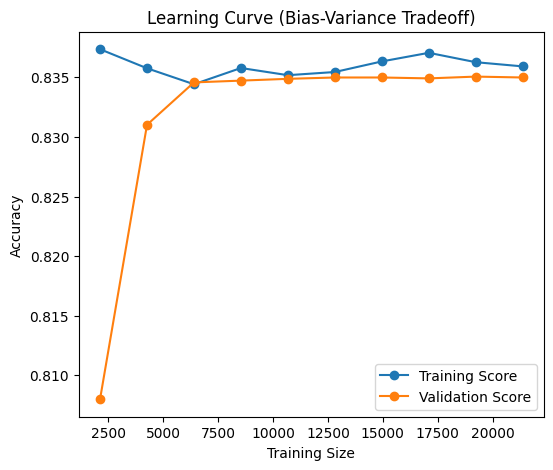

In [65]:

train_sizes, train_scores, test_scores = learning_curve(
    lr,X_preprossed , Y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = []
kf.split(X_preprossed)


for train_idx, test_idx in kf.split(X_preprossed):


    lr.fit(X_preprossed[train_idx], Y.iloc[train_idx])


    preds = lr.predict(X_preprossed[test_idx])
    kf_scores.append(accuracy_score(Y.iloc[test_idx], preds))
print("K-Fold CV Accuracy (5-fold):", np.mean(kf_scores))


# from sklearn.model_selection import LeavePOut

# print("\n=== Leave-P-Out CV (p=2) ===")
# lpo = LeavePOut(p=2)
# lpo_scores = []

# X_small = X.sample(n=100, random_state=42)   # take 100 samples for demo
# y_small = Y.loc[X_small.index]

# # Apply preprocessing to the small subset
# X_small_prep = preprocessor.transform(X_small)


# for train_idx, test_idx in lpo.split(X_small_prep):
#     # print(X_small.iloc[train_idx], y_small.iloc[train_idx]) # Removed print for clarity
#     lr.fit(X_small_prep[train_idx], y_small.iloc[train_idx])
#     preds = lr.predict(X_small_prep[test_idx])
#     lpo_scores.append(accuracy_score(y_small.iloc[test_idx], preds))

# print("Leave-P-Out CV Accuracy (p=2, 10000 samples):", np.mean(lpo_scores))



# # (c) Leave-One-Out CV
# loo = LeaveOneOut()
# loo_scores = []
# for train_idx, test_idx in loo.split(X_preprossed, Y):
#     lr.fit(X_preprossed[train_idx], Y.iloc[train_idx])
#     preds = lr.predict(X_preprossed[test_idx])
#     loo_scores.append(accuracy_score(Y.iloc[test_idx], preds))
# print("Leave-One-Out CV Accuracy:", np.mean(loo_scores))

K-Fold CV Accuracy (5-fold): 0.8356235618150276


In [67]:
y_pred = lr.predict(X_test_prep := preprocessor.transform(X_test))
y_prob = lr.predict_proba(X_test_prep)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8367652564582553
Precision: 0.6828929068150209
Recall (Sensitivity): 0.4325991189427313
F1 Score: 0.5296655879180151
Specificity: 0.9458046113620157

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      4207
         1.0       0.68      0.43      0.53      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



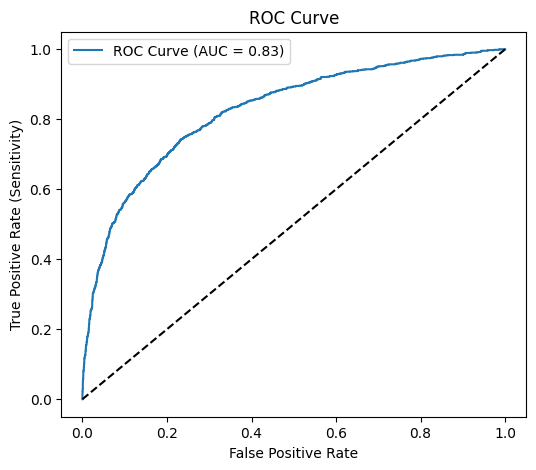

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.show()